In [314]:

# coding: utf-8

# In[346]:


import numpy as np
from matplotlib.pyplot import *
import math
from array import array
import math
import sys
from scipy.integrate import odeint

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

import math
import csv
import pandas

In [317]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

CurrentCost is: 6420.531584945138

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2
CurrentCost is: 5838.245886714179

Now Running Itteration 1 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 5798.077029445312

Now Running Itteration 2 \ 10
the ImprovementItteration is: 2
CurrentCost is: 5697.75174318749

Now Running Itteration 3 \ 10
the ImprovementItteration is: 2
CurrentCost is: 5300.440068896955

Now Running Itteration 4 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 5244.781025096489

Now Running Itteration 5 \ 10
the ImprovementItteration is: 2
CurrentCost is: 5244.781025096489

Now Running Itteration 6 \ 10
the ImprovementItteration is: 2
CurrentCost is: 5183.942166162303

Now Running Itteration 7 \ 10
the ImprovementItteration is: 3
CurrentCost is: 4725.311031356467

Now Running Itteration 8 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 4686

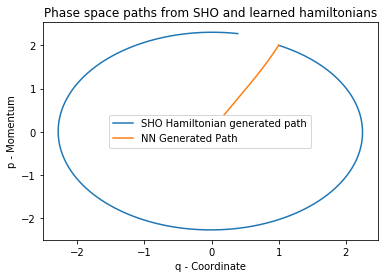

In [327]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too bid
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual







## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
            q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

# Individuals_Parameter_Vector = np.random.rand(70,20)




## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue = 0.01
Maximal_Random_Search = 0.5
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations = 10
print_Cost = 1


x = 1
y = 1
First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
InitialParameters = np.random.rand(70,1)

T_total = 6
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

T_total = 6
# q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
# InitialParameters = Best_Individual
# Best_Individual = Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)


q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Best_Individual,First_two_phase_space_samples,T_total)


plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [328]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [349]:
Number_Of_Nurons_in_5_layer_net = np.array([3,3,3,3,1])
TotalParameters_in_5_layer_net = 2*(Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))

print("TotalParameters_in_5_layer_net",TotalParameters_in_5_layer_net)

TotalParameters_in_5_layer_net 86


In [350]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
        self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
                    1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
        N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
        self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
        N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_




Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W1.shape)

(3, 3)


In [351]:
def Run_Through_5_layer_Net(Net,X):

        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) + 0.1*np.minimum(Z1.real,0) + 1j*(np.maximum(Z1.imag,0) + 0.1*np.minimum(Z1.imag,0))


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4,0) + 0.1*np.minimum(Z4,0)
        A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
    
    
        Z5 = np.dot(Net.W4.T,A3) + Net.b5
        A5 = (10**(-3))*Z5.real

        return A5

CurrentCost is: 43.756020308185306

Now Running Itteration 0 \ 20
the ImprovementItteration is: 2
CurrentCost is: 42.06761534921089

Now Running Itteration 1 \ 20
the ImprovementItteration is: 3
CurrentCost is: 39.67141867012069

Now Running Itteration 2 \ 20
the ImprovementItteration is: 4
CurrentCost is: 38.375287232566606

Now Running Itteration 3 \ 20
the ImprovementItteration is: 5
CurrentCost is: 36.66143221685569

Now Running Itteration 4 \ 20
the ImprovementItteration is: 6
CurrentCost is: 34.489615723351655

Now Running Itteration 5 \ 20
the ImprovementItteration is: 7
CurrentCost is: 32.16780927249816

Now Running Itteration 6 \ 20
the ImprovementItteration is: 8
CurrentCost is: 29.010631813198565

Now Running Itteration 7 \ 20
the ImprovementItteration is: 9
CurrentCost is: 27.299271719038366

Now Running Itteration 8 \ 20
the ImprovementItteration is: 10
CurrentCost is: 26.4191255510115

Now Running Itteration 9 \ 20
the ImprovementItteration is: 11
CurrentCost is: 23.93368

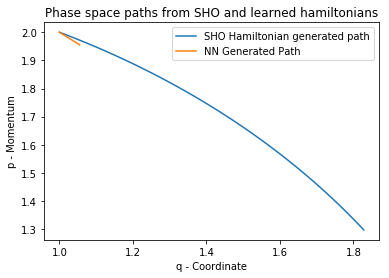

CurrentCost is: 18.647891264031212

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 17.995441937628584

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 17.018161387054537

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 16.21755401023564

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 14.798922773109371

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


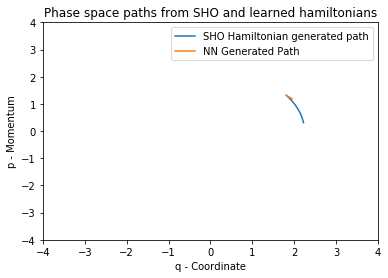

CurrentCost is: 16.551163100604203

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.695522618967363

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 15.147631015150857

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 14.587143977665024

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 13.666292606945563

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


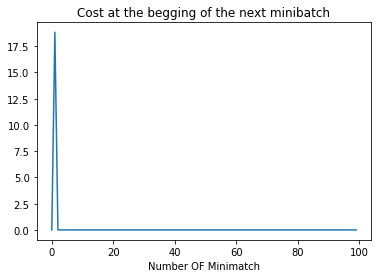

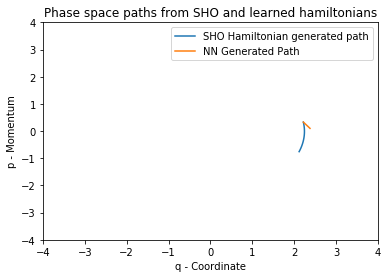

CurrentCost is: 17.29614379457873

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 16.757880632174704

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 16.100937787391572

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 15.34886182370527

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 14.220376720901083

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


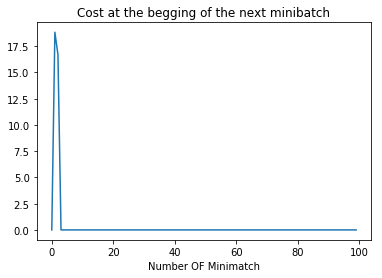

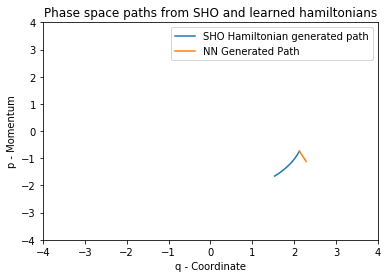

CurrentCost is: 23.959375387820884

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 23.014515529449554

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 22.35927015755407

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 21.497326532939237

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 21.291576465820697

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


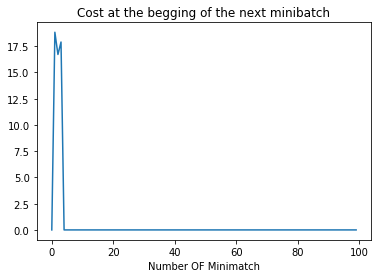

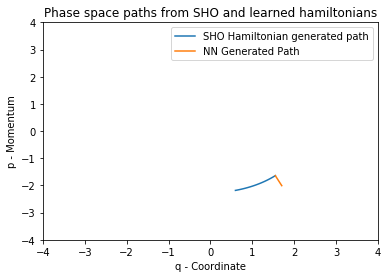

CurrentCost is: 24.090637833804724

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 23.372239409329858

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 23.184556181822273

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 22.595978336012394

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 22.17256606779694

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


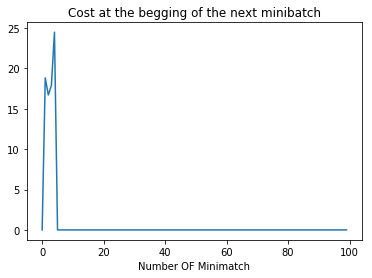

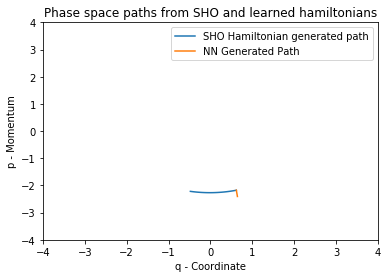

CurrentCost is: 20.686485288454904

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.368488016541747

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 19.933271845946884

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 19.84236860080593

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 19.70796061879082

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


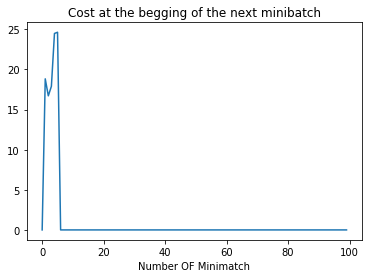

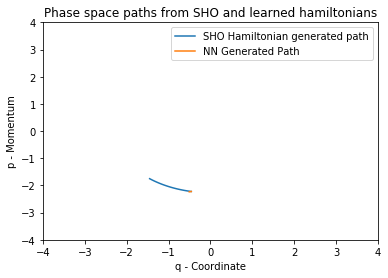

CurrentCost is: 20.790209342054542

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.500478627025057

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 20.410801866440277

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 20.05712791030457

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 19.825927523597116

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


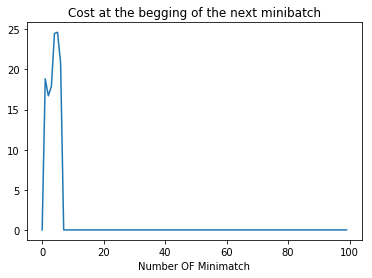

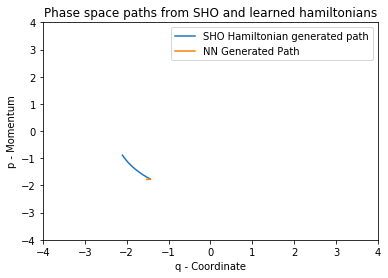

CurrentCost is: 21.139365395126102

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.899859656067257

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 20.454778807034128

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 20.29878854606645

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 19.37955687888791

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


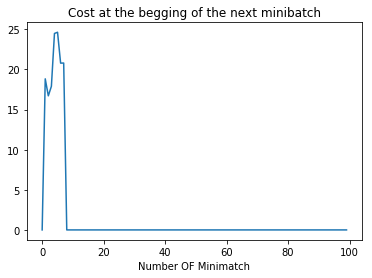

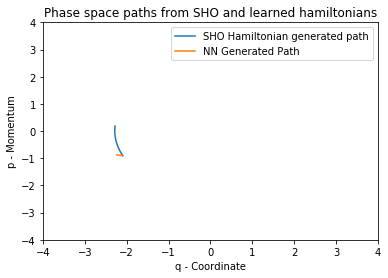

CurrentCost is: 23.467455405093116

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 22.548378211655628

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 22.2839904380309

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 21.632171576347332

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 20.99506090091363

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


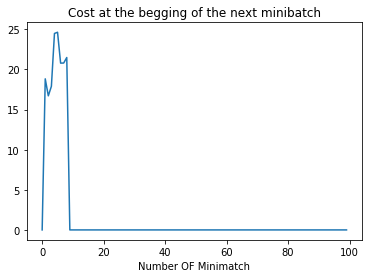

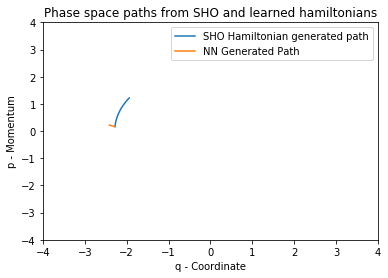

CurrentCost is: 23.97593692534601

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 23.848757215246266

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 23.848757215246266

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 23.722862783197215

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 23.154528208403384

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


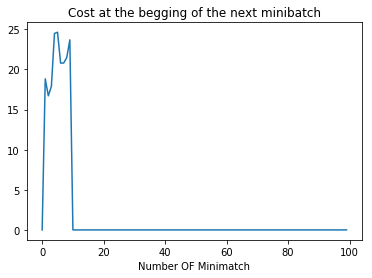

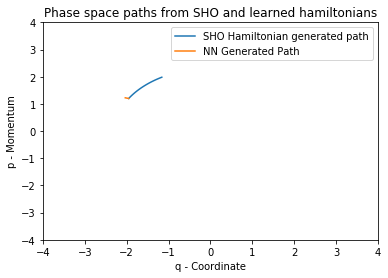

CurrentCost is: 21.49182277694192

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.859353172771677

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 20.698038445710516

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 20.145873452387185

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 19.220669441887114

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


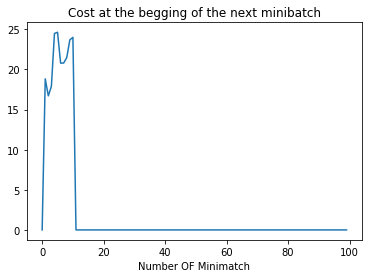

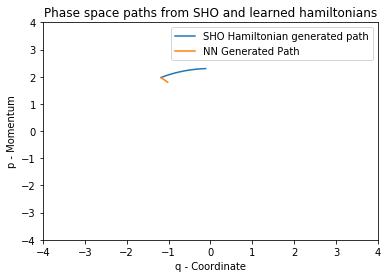

CurrentCost is: 14.713199020172238

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 13.876101800258986

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 13.458270392418367

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 12.97408972390322

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 12.287996425889652

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


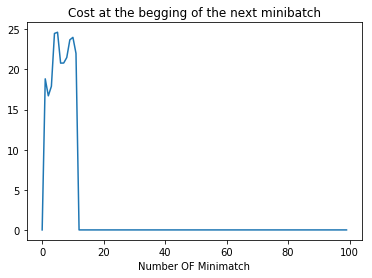

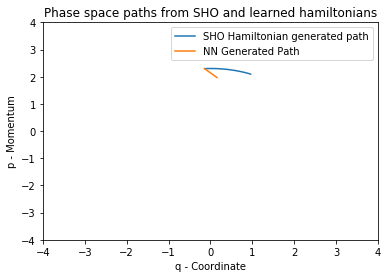

CurrentCost is: 7.846224531435137

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.190690826598377

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.283078913822371

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.247632004495403

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.303521171869981

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


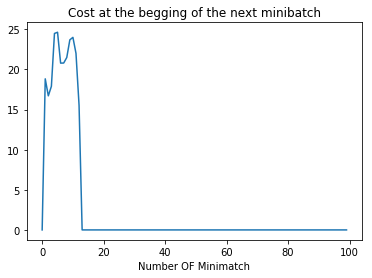

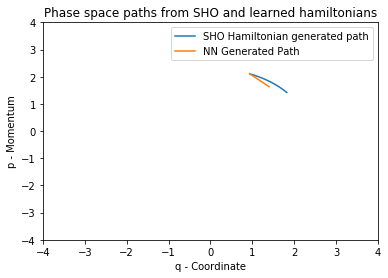

CurrentCost is: 4.130303921297699

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.6845732091173784

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.627120961050362

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.074156565234587

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.2099327867620335

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


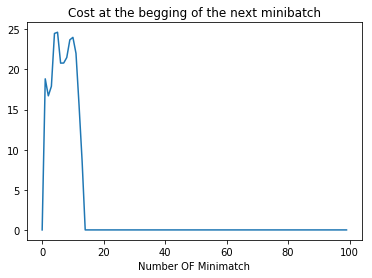

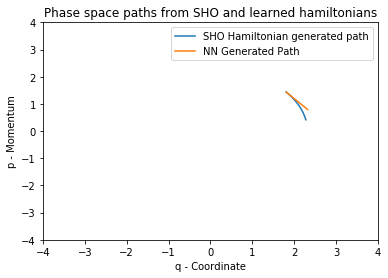

CurrentCost is: 7.5400037193825975

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.091711825466454

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.263498981385343

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.762781786400199

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.878622999529001

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


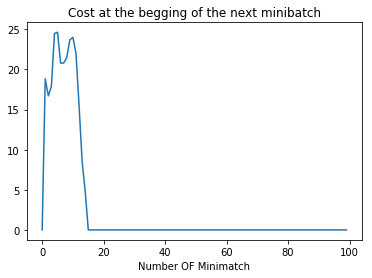

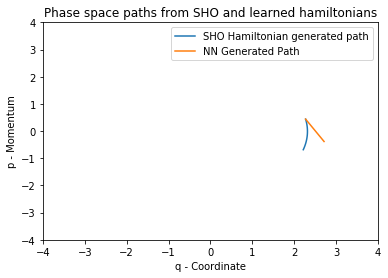

CurrentCost is: 13.772704933136419

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 12.831969330452194

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 11.515218645250005

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 10.759385891813354

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 10.759385891813354

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


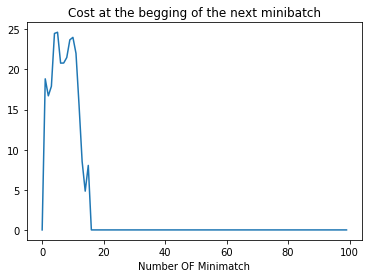

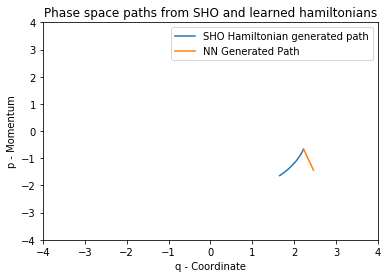

CurrentCost is: 18.194166200299588

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.637735300946174

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 15.518551630843634

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 14.470635053642523

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 14.470635053642523

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


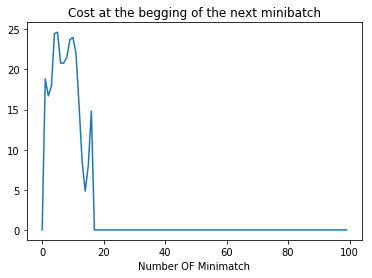

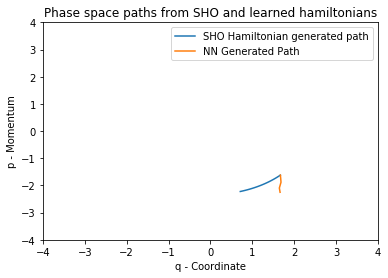

CurrentCost is: 13.832812124928129

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 13.33952838964655

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 12.552854631269778

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 11.324731649162302

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 10.2586639862534

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


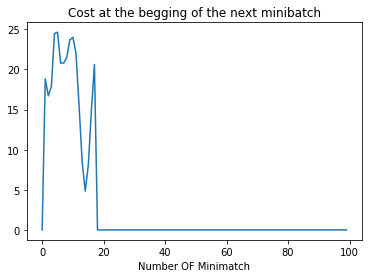

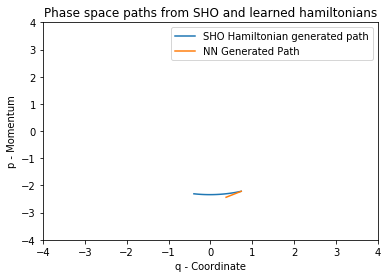

CurrentCost is: 15.580480282276692

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 14.197362328439143

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 13.40869672868787

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 13.40869672868787

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 12.56051294306842

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


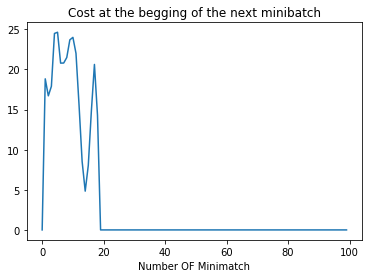

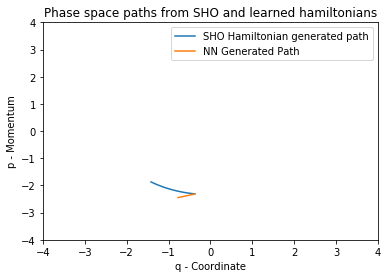

CurrentCost is: 21.120633703242653

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.5944186442617

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 20.043621195837698

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 19.033445556434142

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 18.45831172403542

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


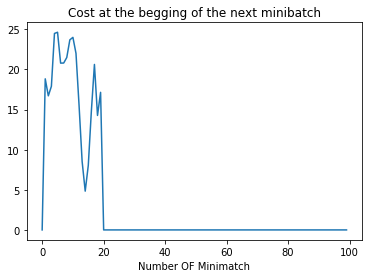

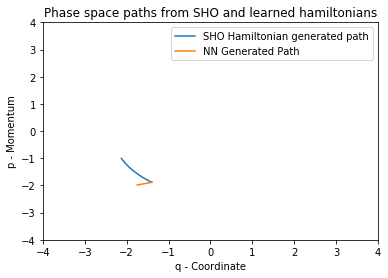

CurrentCost is: 19.337491122817656

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 19.337491122817656

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 18.90632997979856

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 18.463371577314255

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 18.153670046526223

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


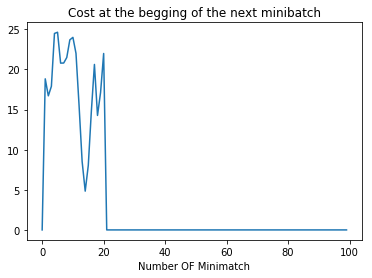

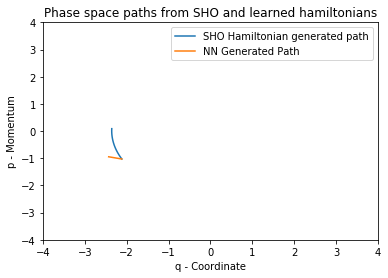

CurrentCost is: 23.80002845051028

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 23.115230299469744

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 22.132872676649445

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 21.54328118648364

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 21.28448912420265

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


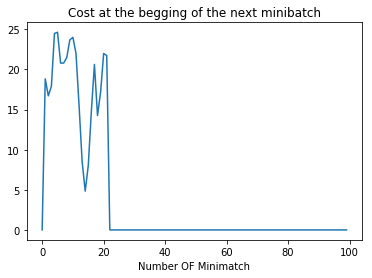

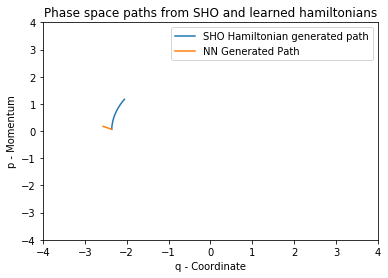

CurrentCost is: 21.022176716326886

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 20.637368061664603

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 20.060777472220067

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 19.565738846024992

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 18.93563394716749

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


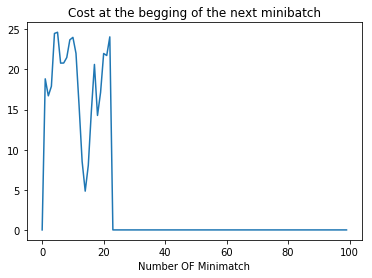

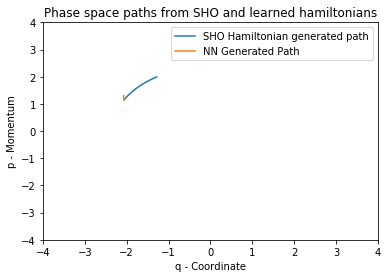

CurrentCost is: 17.992137855100157

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 16.581137708957637

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 15.464812490336058

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 14.129372362183606

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 12.459847940685714

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


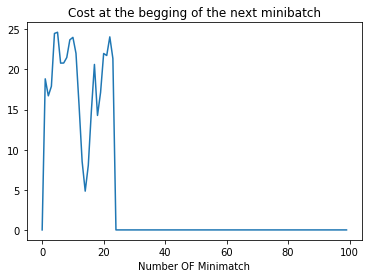

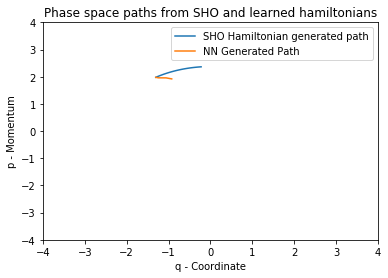

CurrentCost is: 12.209574099494699

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 11.394697571879467

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 10.594806752520144

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 9.44776597752856

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 8.405175106976456

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


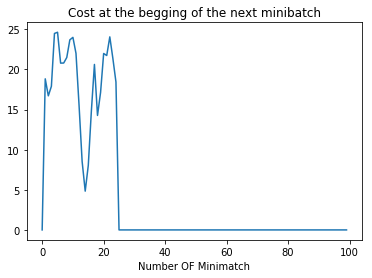

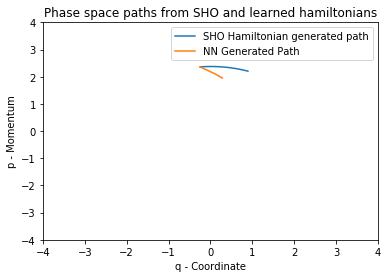

CurrentCost is: 4.308126214371902

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.764954203094934

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.3590101465470132

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.1201846307828442

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.500496340638834

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


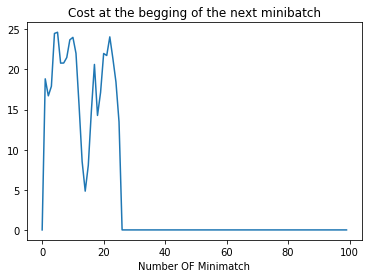

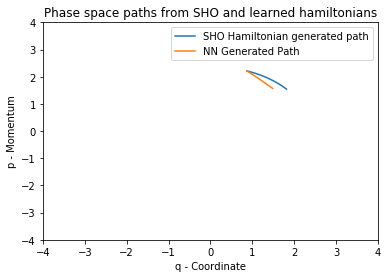

CurrentCost is: 1.922302660541439

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.3093063128977287

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.9264043972457516

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.41641111331587005

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.20356930637411508

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


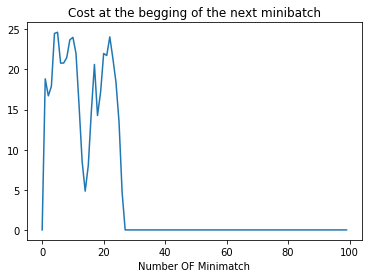

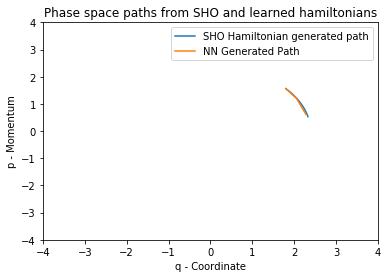

CurrentCost is: 2.04955618714222

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.8290032479459257

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.5340416773899574

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.5109490156516985

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.1084177929829575

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


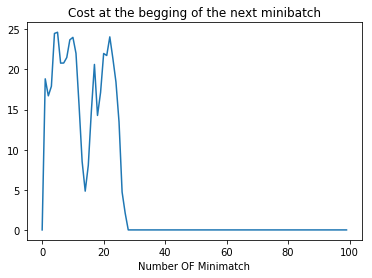

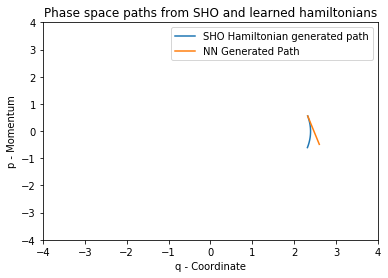

CurrentCost is: 6.282110208119756

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.762623105534015

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.085881198942779

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.136513604814513

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.0313011931728093

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


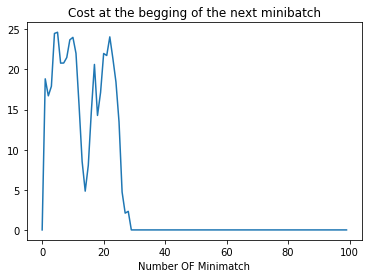

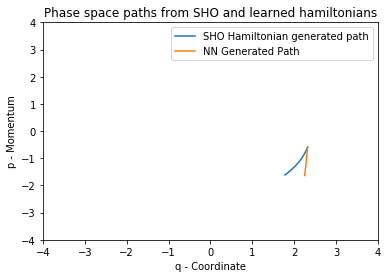

CurrentCost is: 11.899075813959042

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 10.656730877096892

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.411454833797691

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 8.389771286562242

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.6319490809869075

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


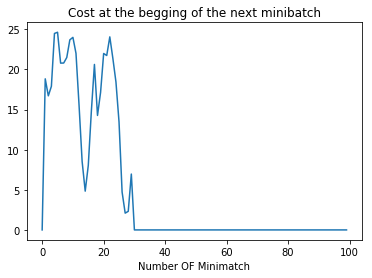

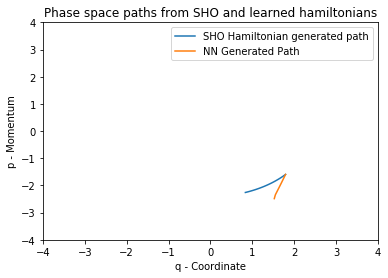

CurrentCost is: 17.175557860045455

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.49847844697219

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 13.851101215115692

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 12.277300729547683

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 10.249569546317645

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


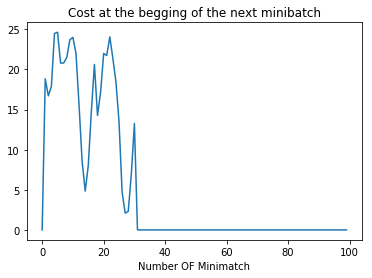

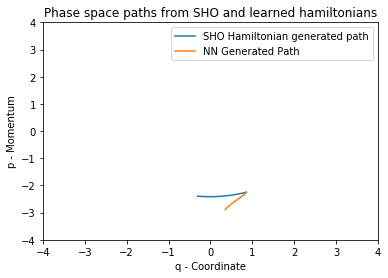

CurrentCost is: 14.468632890792446

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 12.92355224375626

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 12.506366714227914

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 12.336083019719231

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 12.251205462680334

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


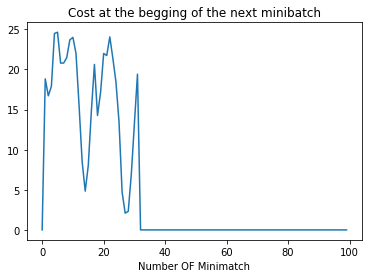

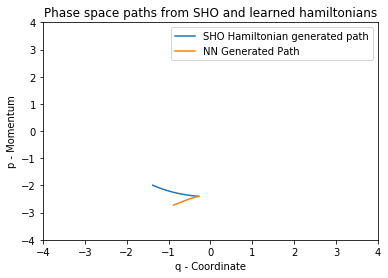

CurrentCost is: 18.58266928468188

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 18.106883672263187

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 17.446825303354245

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 16.502482085735362

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 15.532887522544556

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


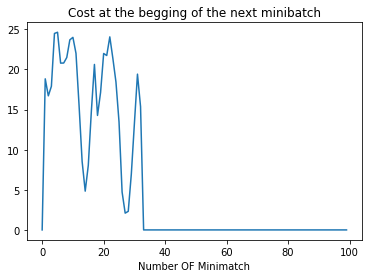

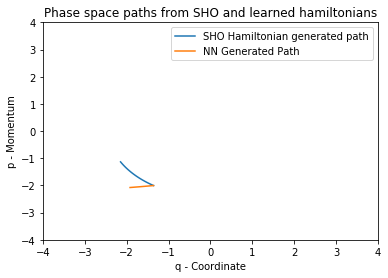

CurrentCost is: 23.628418583966887

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 22.40691173802183

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 21.45233643676664

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 20.73611391606905

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 19.283829888432305

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


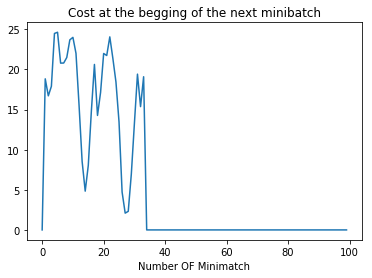

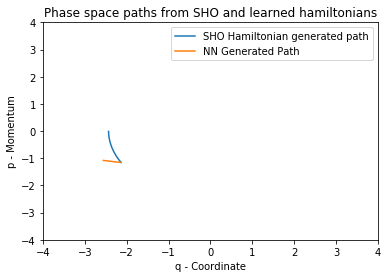

CurrentCost is: 11.904558953412515

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 11.214930001229028

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.994257270218162

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 8.670162127482213

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.622877542064505

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


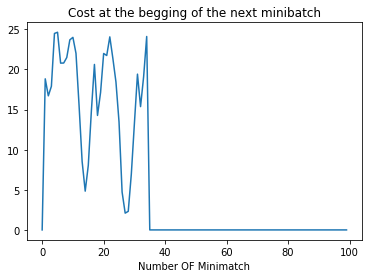

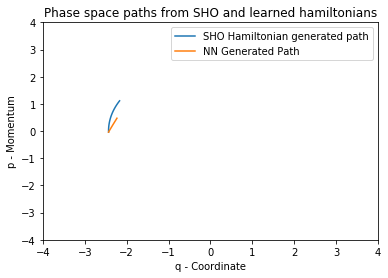

CurrentCost is: 7.808727465893162

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.054939878018798

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.375353622662699

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.046965556163971

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.8172424782309564

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


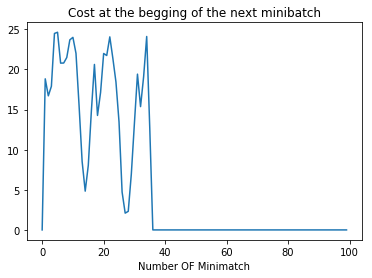

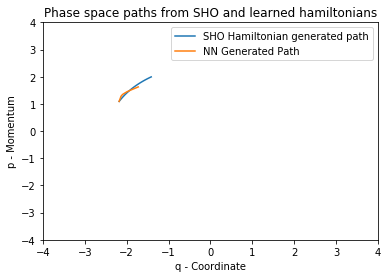

CurrentCost is: 4.180567398128539

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.361037602858543

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.544229236033608

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.9290774055070854

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.1078397509524445

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


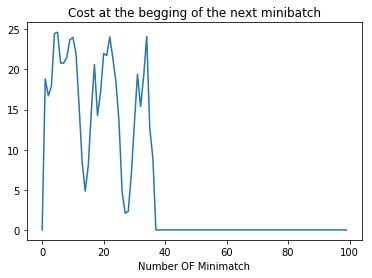

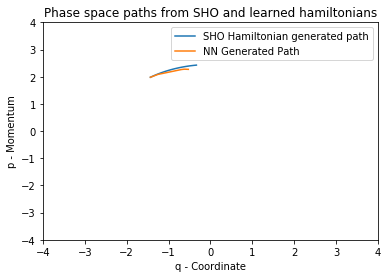

CurrentCost is: 2.111867299260013

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.6492538603967364

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.1328546567193014

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.32058011646067275

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.10379166251907881

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


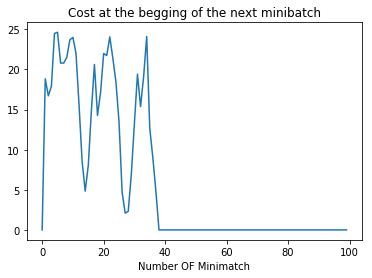

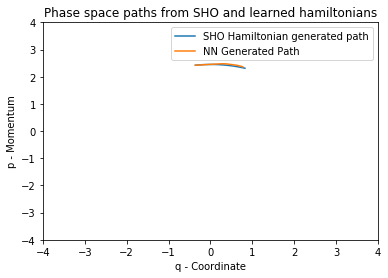

CurrentCost is: 0.4039447917117373

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3561301018302405

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.22759306014104896

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.10239904034793634

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.09234108658724241

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


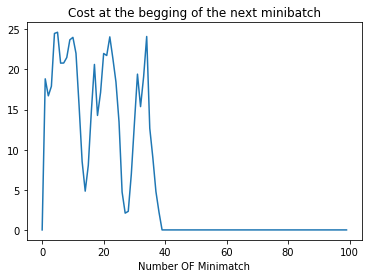

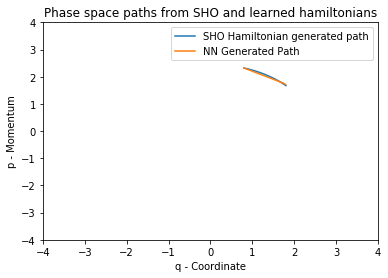

CurrentCost is: 0.1846195797163512

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.06801102215653597

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.05545255818522228

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.03581295638895569

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03581295638895569

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


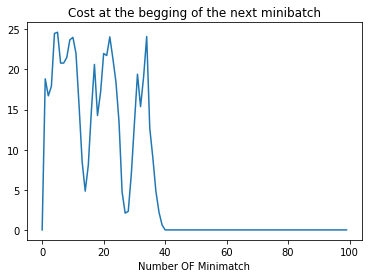

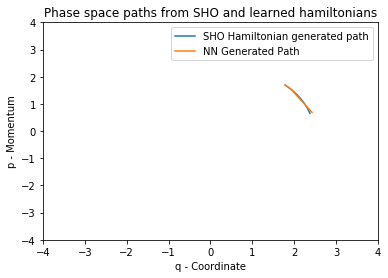

CurrentCost is: 0.1624042757984387

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.0638118893950569

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.0638118893950569

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.0585199138802525

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.044722056753273634

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


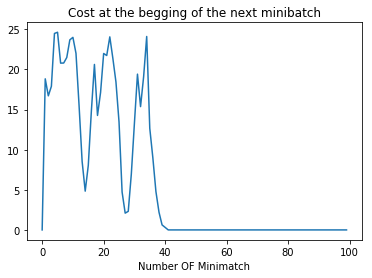

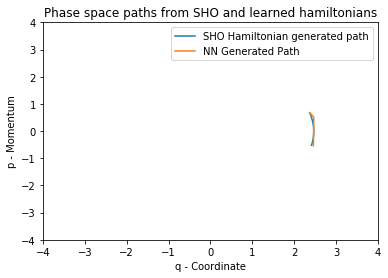

CurrentCost is: 2.5130386328753818

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.191179144063065

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.6687762378806559

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.9981579612737754

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.5995855851280636

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


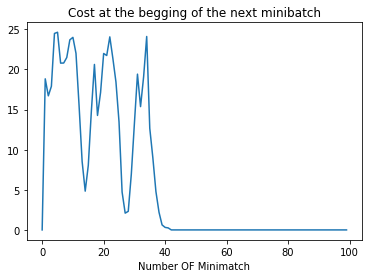

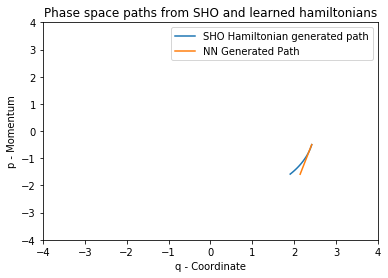

CurrentCost is: 8.238543709704015

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.220937825111608

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.311180614192482

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.584840678654544

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.947999704170363

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


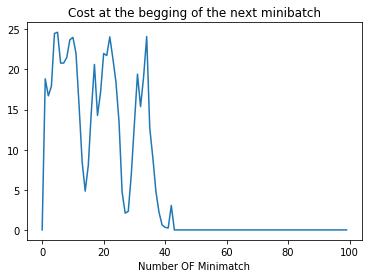

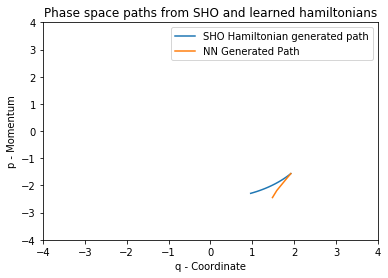

CurrentCost is: 11.02803975439513

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 10.667133161865364

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.264140773922847

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 7.920161780309869

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.322069307032012

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


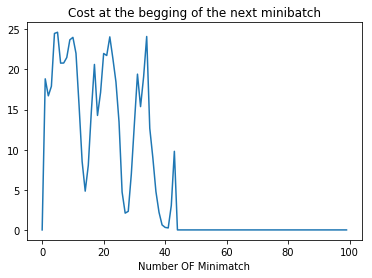

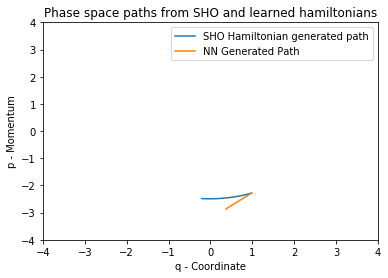

CurrentCost is: 26.732731512566527

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 24.763269760699387

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 23.173023583951537

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 21.8497415827644

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 17.391940265381535

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


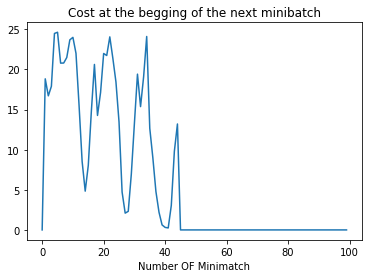

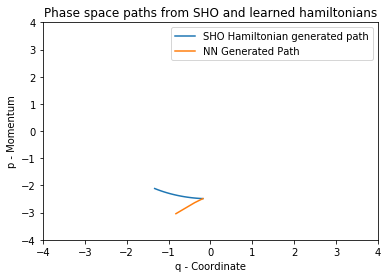

CurrentCost is: 17.473242594252135

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 15.067594008950177

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 13.035407440176002

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 11.967113960118075

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 10.953344897358596

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


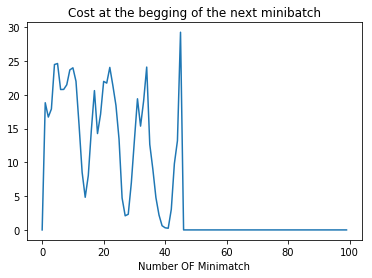

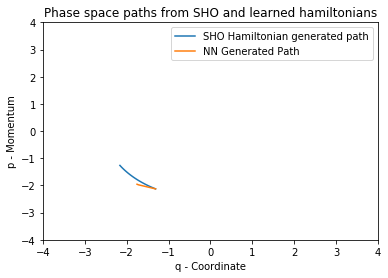

CurrentCost is: 10.438058675119072

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 9.726941842351795

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.121301710336285

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 7.6698731860589655

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.4438990792068

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


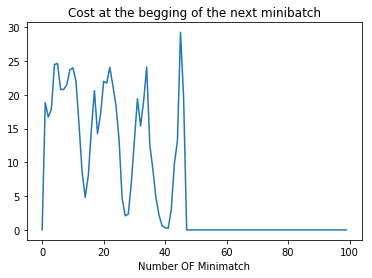

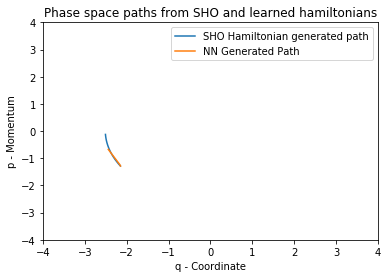

CurrentCost is: 4.457868533235195

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.1924058943042852

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.173033558929362

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.570004501249788

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.1785912823066114

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


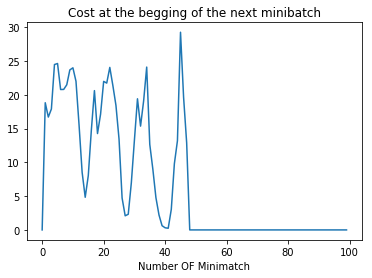

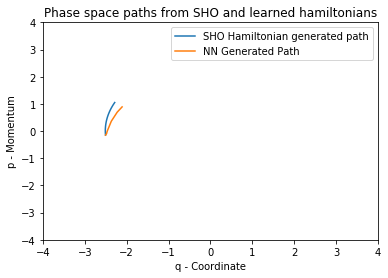

CurrentCost is: 0.3552087707776501

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.19871933543167722

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.06235684906663485

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.028651365501373777

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.028651365501373777

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


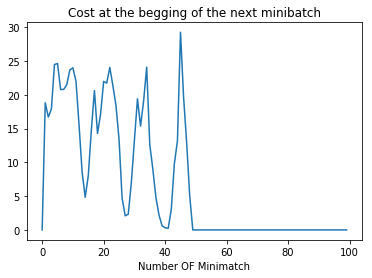

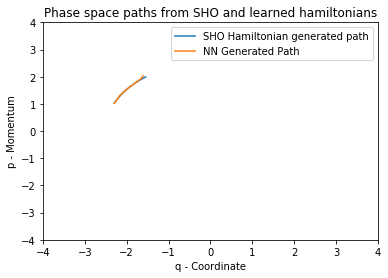

CurrentCost is: 8.70194179780202

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.8010472155956805

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.633396107299022

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.9680122671746254

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.0734370473437873

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


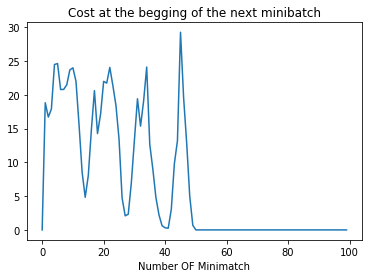

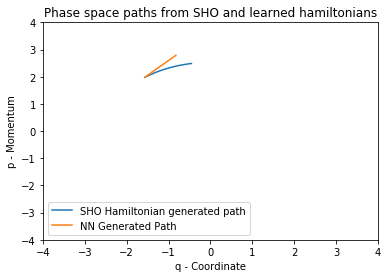

CurrentCost is: 8.035294098029336

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.520309792356564

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.538354784583775

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.125659019222945

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.261819038249709

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


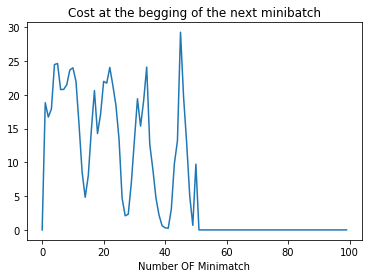

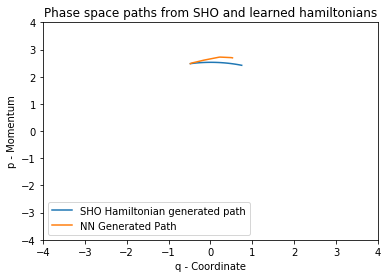

CurrentCost is: 1.9842063763123927

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.6466158138942537

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.160412830401041

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.8981275023927227

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.630612480761491

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


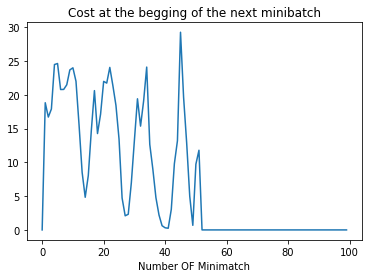

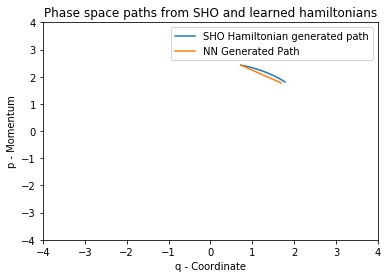

CurrentCost is: 1.9394793517083926

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.4163661511705246

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.1515985673098663

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.7481176878307378

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.28462056498631216

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


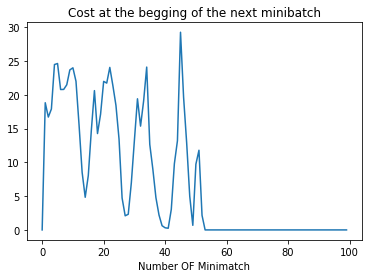

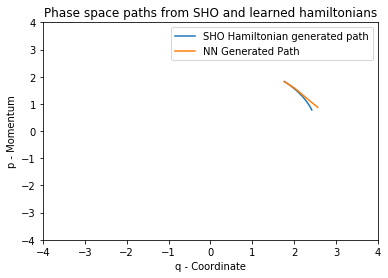

CurrentCost is: 0.7945381228161805

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.2355451759017917

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.20409504429880346

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.09938609397658477

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.09938609397658477

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


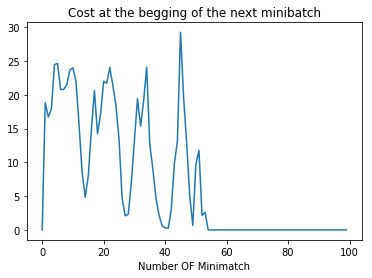

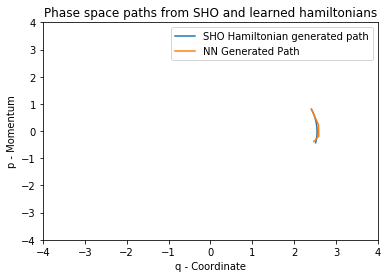

CurrentCost is: 5.995951270141008

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.196924782667572

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.6317711793795353

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.6206353437037406

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.5112675960887088

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


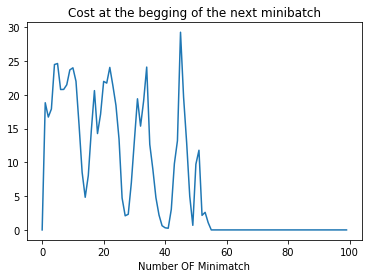

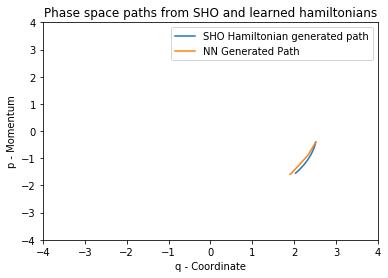

CurrentCost is: 1.0053411657377207

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.5467266538200746

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.22112143626343236

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.08604458095015337

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.019136022112558798

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


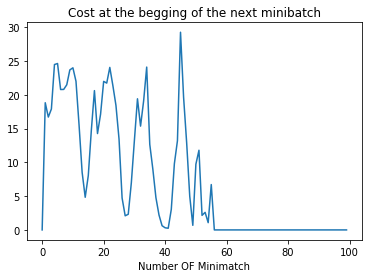

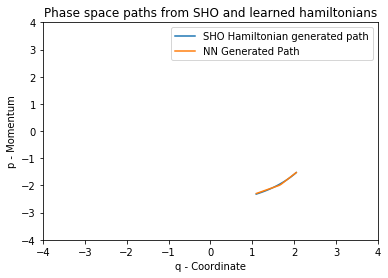

CurrentCost is: 0.3198321999788947

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3128683534308214

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.14699135140111508

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.13437376096251424

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.0946677079517065

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


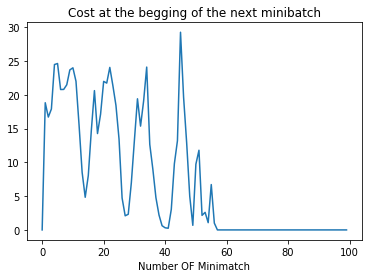

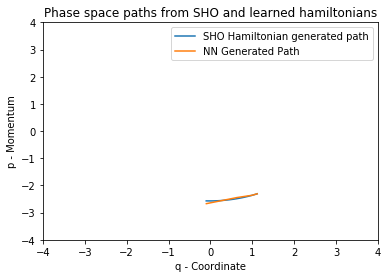

CurrentCost is: 4.237156640625546

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.5460413084041953

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.4112975770205036

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.9789645870007306

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.2875226854116388

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


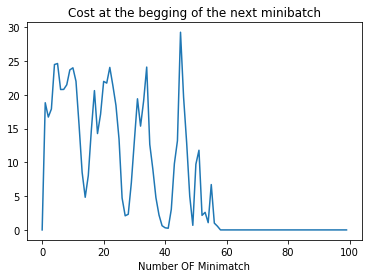

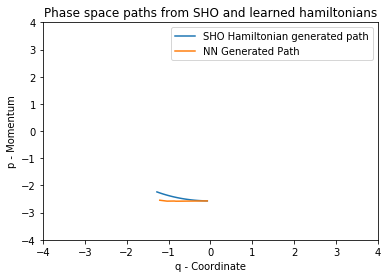

CurrentCost is: 5.121131612174732

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.273856331413764

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.551277703022913

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.3204075145901237

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.5246156655221943

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


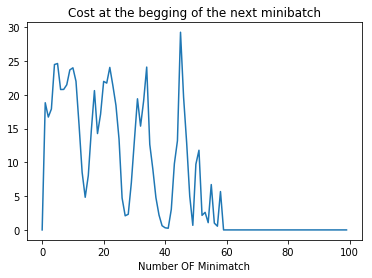

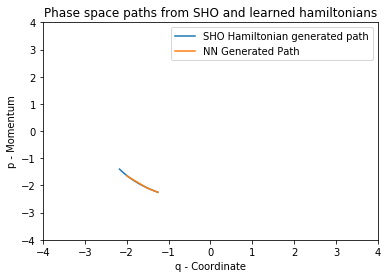

CurrentCost is: 2.0022710483078976

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.4774810255060973

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.716354996961925

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.2836234299742596

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.13308987887515766

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


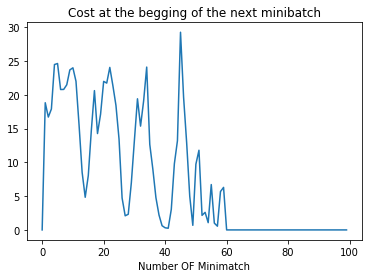

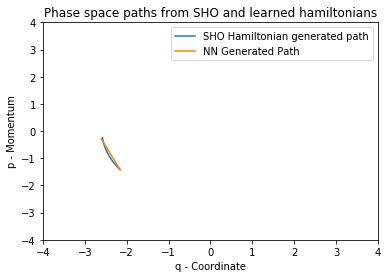

CurrentCost is: 0.25677263722378546

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.25030981347374504

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.17921802365841494

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.1651199929476946

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.1651199929476946

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


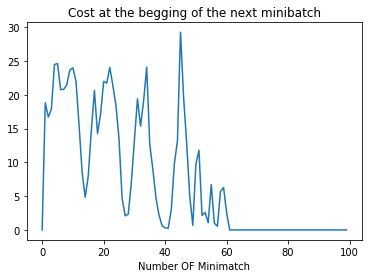

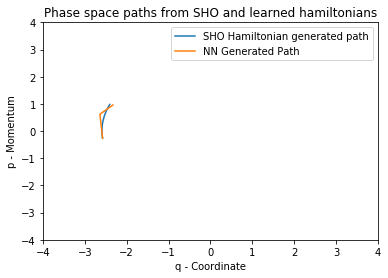

CurrentCost is: 0.25439566318835116

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.19013308818924265

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.1426302239727325

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.1426302239727325

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.12201188279068864

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


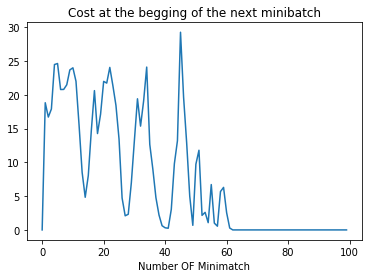

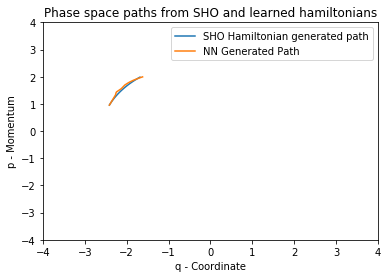

CurrentCost is: 0.4351632410545147

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.24126452779411706

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.048928463299251365

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.048928463299251365

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.04267362269151935

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


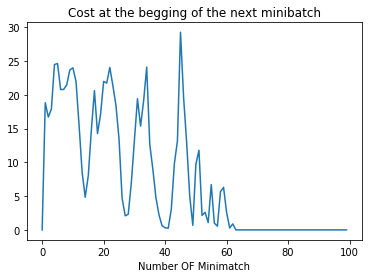

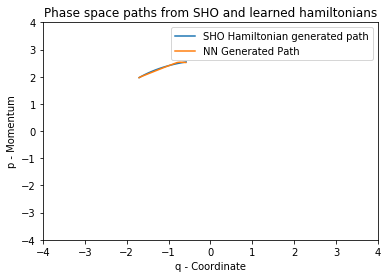

CurrentCost is: 4.513363187106805

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.1090598078805933

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.9032116104521879

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.19599250698589965

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.16474362480333615

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


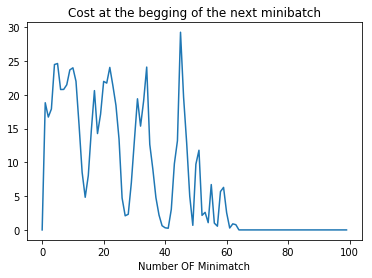

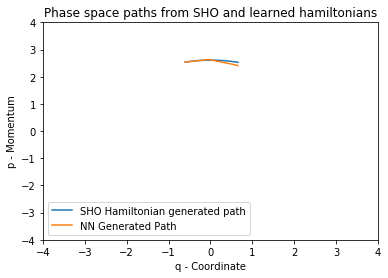

CurrentCost is: 0.06613044250265933

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.025795568648379178

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.025795568648379178

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.025795568648379178

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.025795568648379178

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


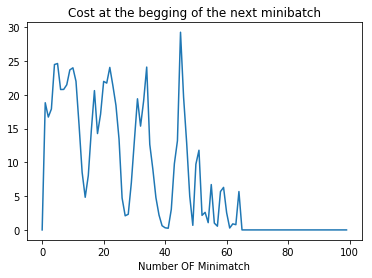

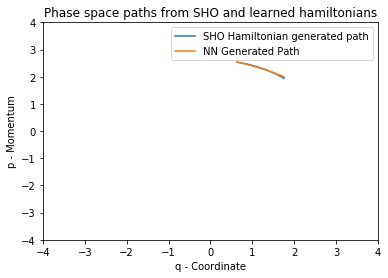

CurrentCost is: 3.546680689228248

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.1406723187857932

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.033979053204948

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.317285161451107

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.8325931382841416

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


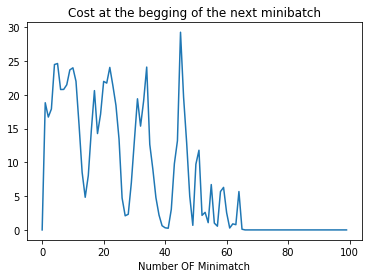

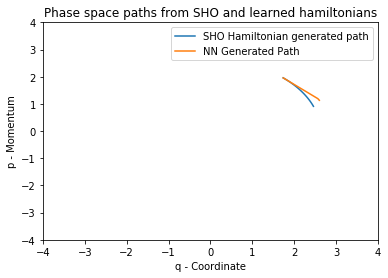

CurrentCost is: 1.9221582679496954

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.5585810775689928

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.0479287286750605

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.8227855707452773

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.30743271893190494

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


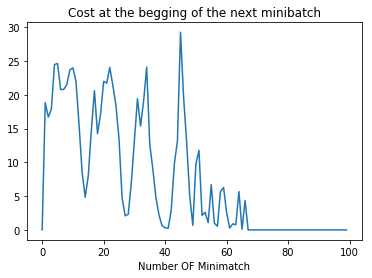

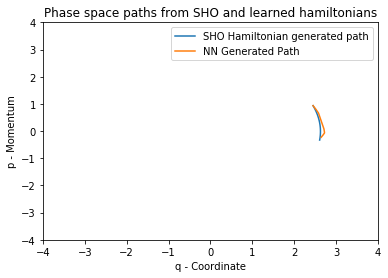

CurrentCost is: 1.0774292459672257

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.7724467786853577

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.3979271756179824

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.07270934184849917

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.0659677669998096

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


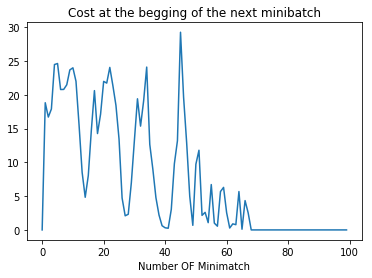

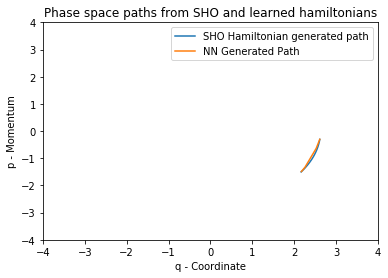

CurrentCost is: 0.5828374084758207

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.08791080603885769

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.0113634790818001

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.009411922993355104

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.009411922993355104

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


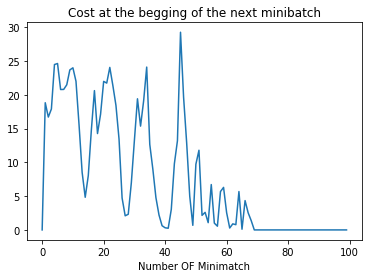

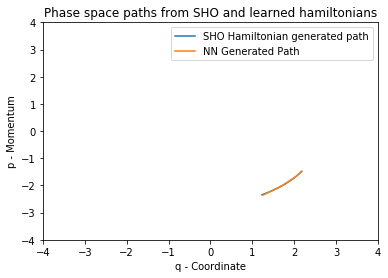

CurrentCost is: 0.7525668186910207

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.23335194820642624

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.12234147770148414

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.12234147770148414

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.12234147770148414

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


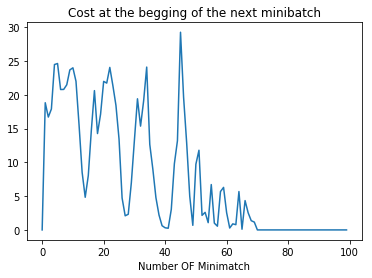

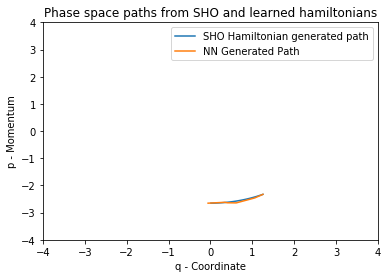

CurrentCost is: 4.197338501055826

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.5539971719828238

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.5638114324957388

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.1847285215973865

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.12673258207742777

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


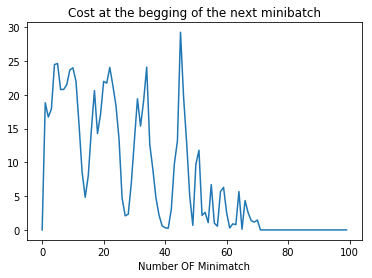

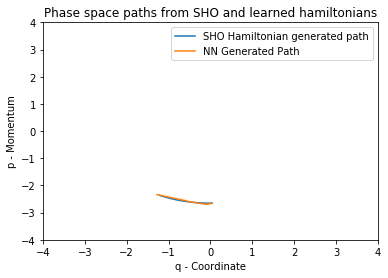

CurrentCost is: 2.3608835446398566

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.9184670503392616

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.4482016952087604

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.319595104828466

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.855509199202631

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


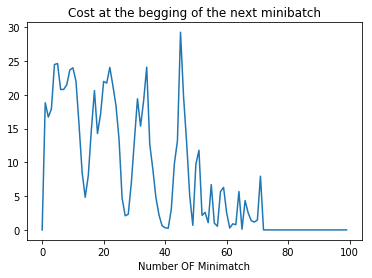

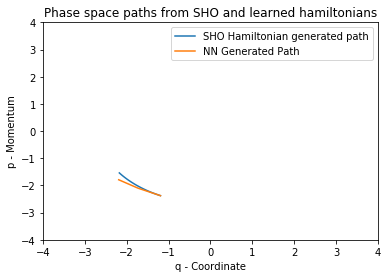

CurrentCost is: 6.395219868801421

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.888725034638371

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.9745318071470863

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.3763577561393245

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.43377757496197

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


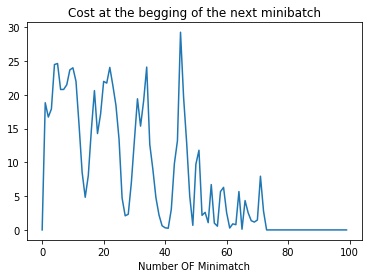

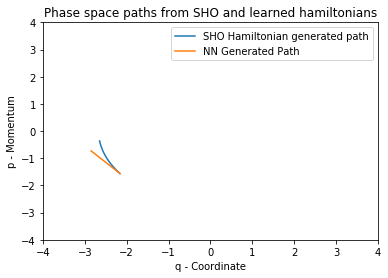

CurrentCost is: 3.219291777714497

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.4333381633891022

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.134049700064519

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.5746287792840696

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.38501197983876356

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


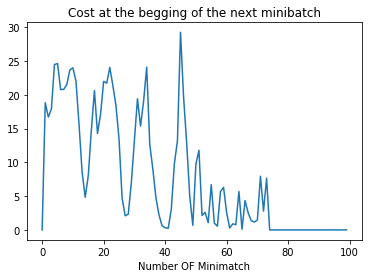

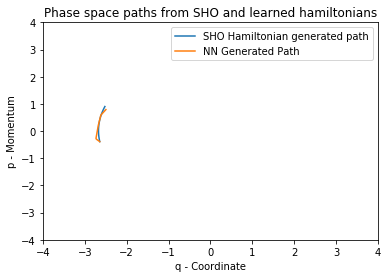

CurrentCost is: 1.4583346761767415

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.5565159959939041

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.21832057914174366

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.2045262863608727

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.17185212527796792

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


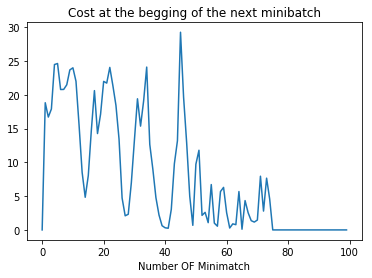

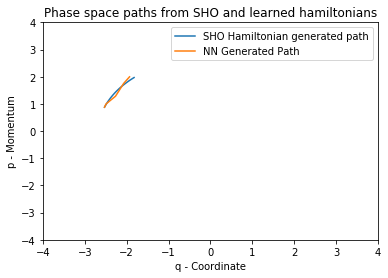

CurrentCost is: 0.515701649707754

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.31866814860449905

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.12233599729489109

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.1134941175115854

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.1134941175115854

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


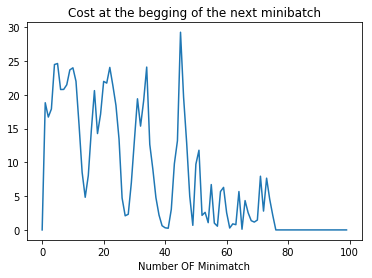

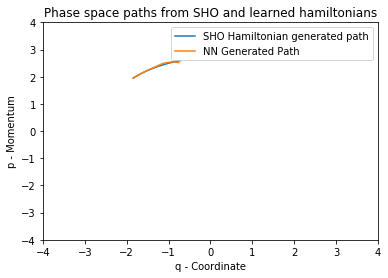

CurrentCost is: 1.7594228085593984

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.8740600543936115

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.5164648947244355

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.2983709116603198

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.12394138141367417

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


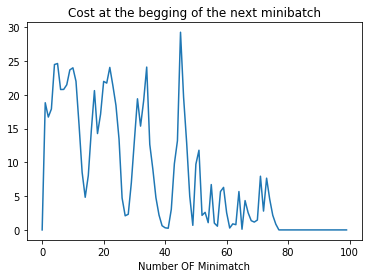

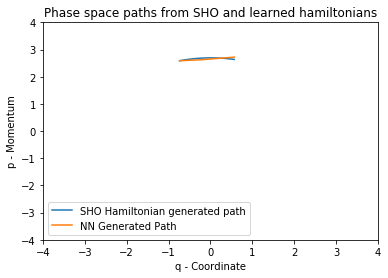

CurrentCost is: 6.384959328718786

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.074181396535681

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.693877192690134

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.5399486126896242

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.1838743814985895

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


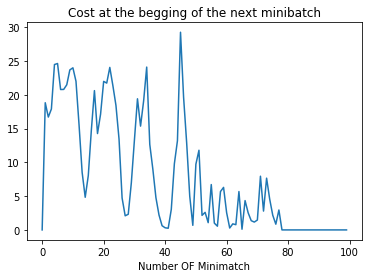

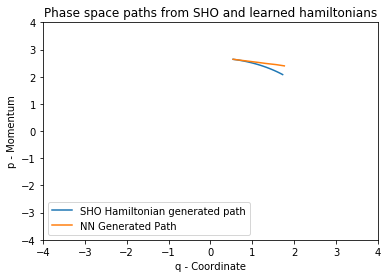

CurrentCost is: 10.236335037726995

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.688073181114148

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.673392980346175

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.16382272226148

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.0166935720342027

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


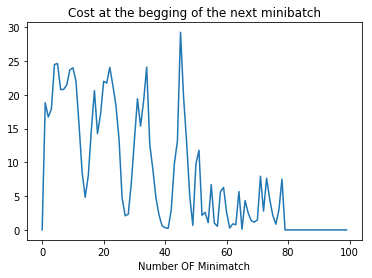

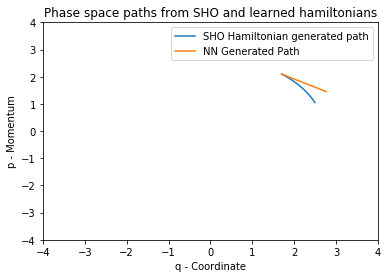

CurrentCost is: 8.511889952622292

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.8613310697735965

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.062963335443574

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.667983649066818

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.308688218671907

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


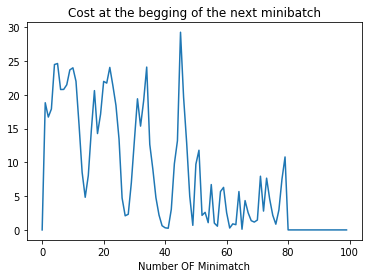

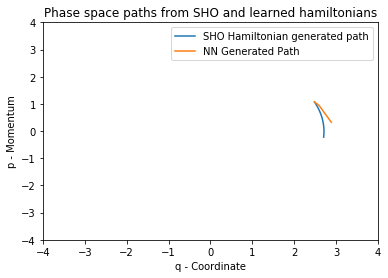

CurrentCost is: 7.539960600515709

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.441874074594111

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.357959499907559

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.557941949575284

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.7925149582261124

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


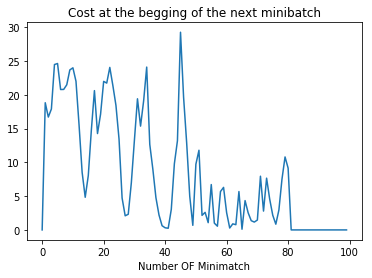

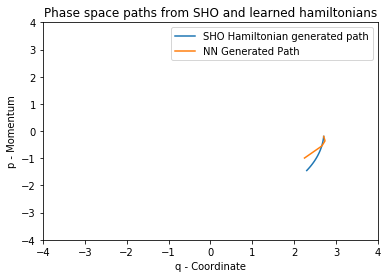

CurrentCost is: 0.7534277739886952

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.30346871078183435

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.18918136254514484

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.18918136254514484

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.18601784860776627

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


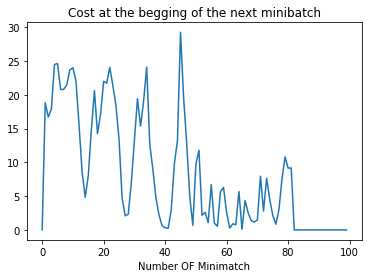

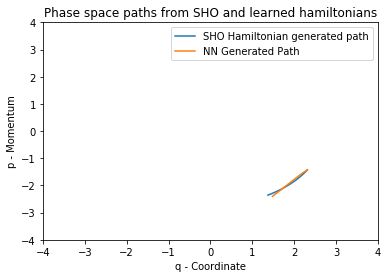

CurrentCost is: 2.916583400872519

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.9107232581008895

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6211685847146264

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.42026189043952356

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.3818507251999835

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


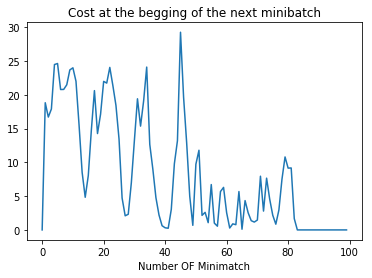

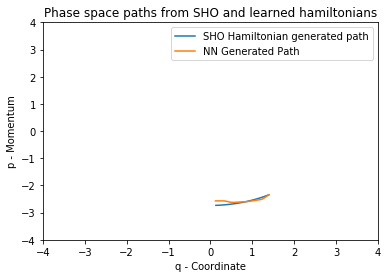

CurrentCost is: 0.02183409486760387

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.011273654371526649

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.011273654371526649

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.011273654371526649

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.011273654371526649

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


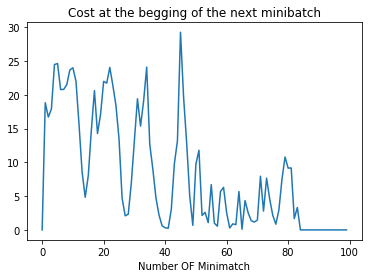

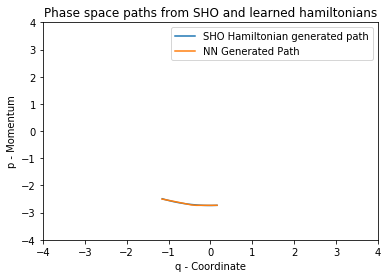

CurrentCost is: 2.453314028536497

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.826302374623749

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.9827385538635862

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.812086568270748

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.43681640480322304

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


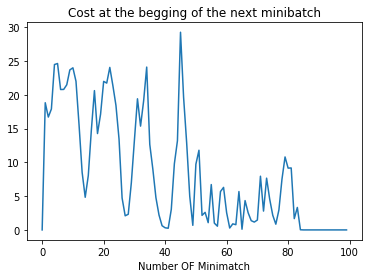

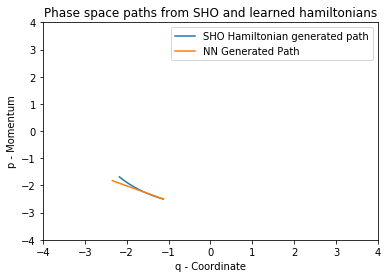

CurrentCost is: 2.317751301973075

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.2551443967105609

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.501219906142459

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.2161834258064555

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.10888127127997407

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


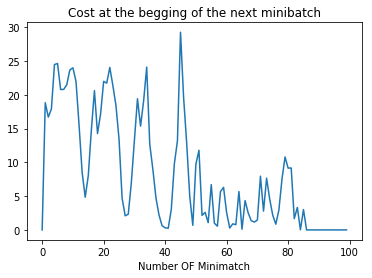

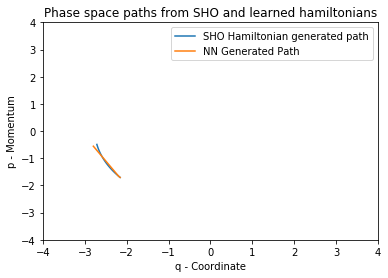

CurrentCost is: 2.6423317657321848

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.85258649740708

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.1106520144121745

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.8071590114210725

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.35660003546463787

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


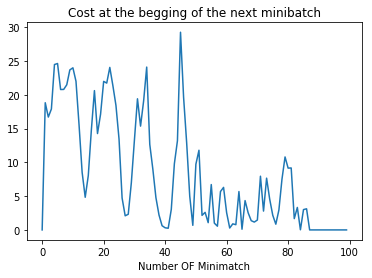

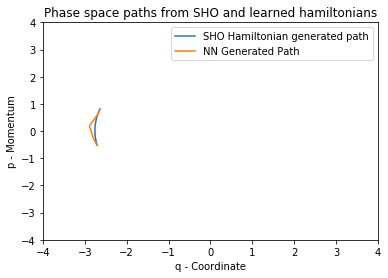

CurrentCost is: 0.45859669607070686

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.12177751379936315

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.0828904669711454

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.0828904669711454

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.07503666443216542

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


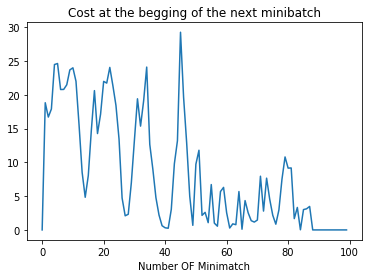

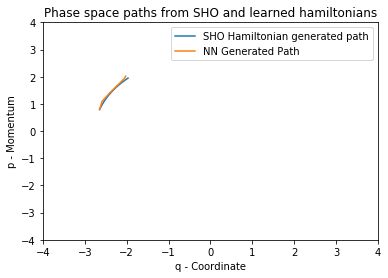

CurrentCost is: 2.3314337698368566

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.6649084965807068

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.8224064659653919

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.21981456427922166

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.10575026900741173

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


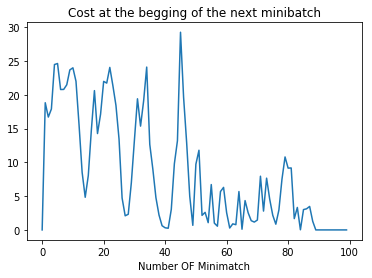

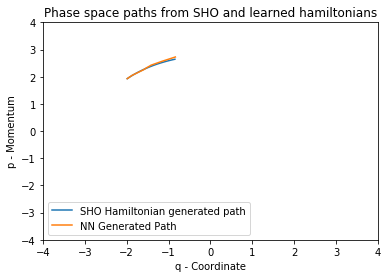

CurrentCost is: 0.8447194339695355

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.18565018758219243

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.025493953302375187

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.015803429924747696

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.015803429924747696

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


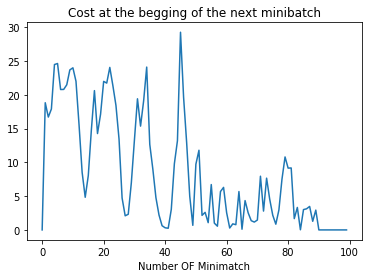

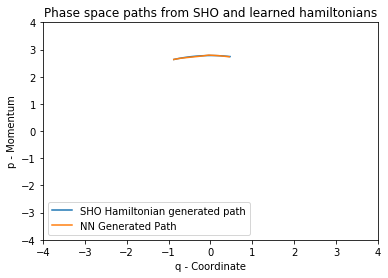

CurrentCost is: 0.17459878928240335

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.08102031985719498

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.08102031985719498

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.06909766457762245

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.052558011957603304

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


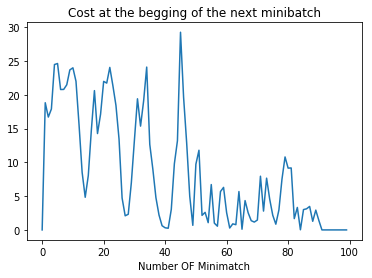

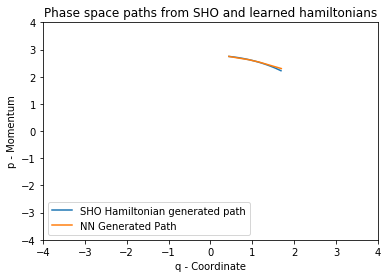

CurrentCost is: 3.027038467547008

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.2574367598580087

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.470020339666617

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.1486703290604132

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.4148213561133094

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


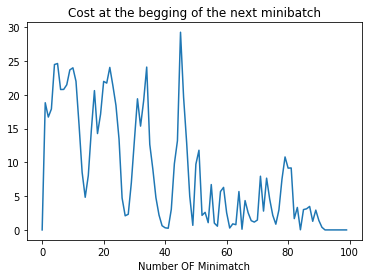

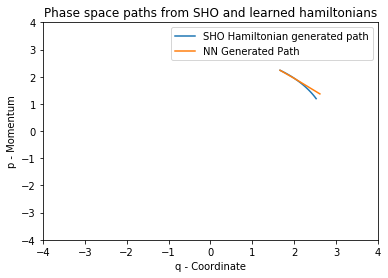

CurrentCost is: 1.105039160199076

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.09087815609798598

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.06577843444563707

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.04775372290801019

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.04775372290801019

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


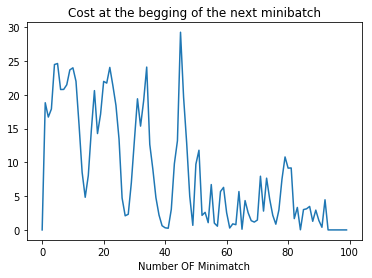

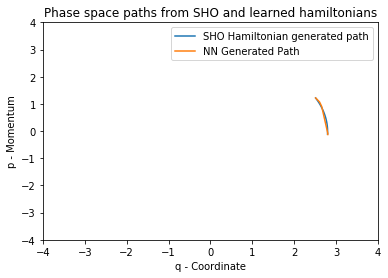

CurrentCost is: 0.9743898339619761

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.639662370113539

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.22533852570017457

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.16588043546226042

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.16588043546226042

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


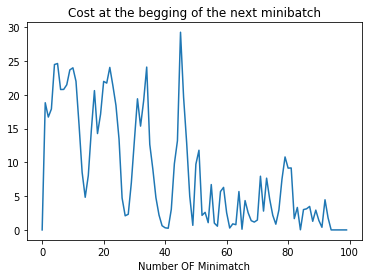

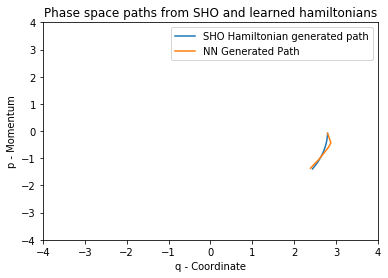

CurrentCost is: 0.7192728148844438

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.4264353769308064

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.2002401115286672

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.16071660047490163

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.13708240550947814

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


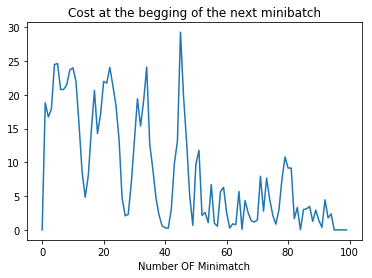

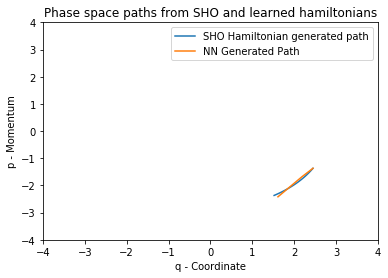

CurrentCost is: 6.548955858480179

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.280866220577694

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 4.13023341064688

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.2188338198868545

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.3035913881302874

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


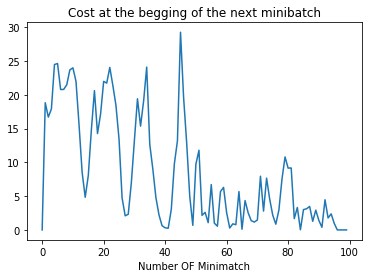

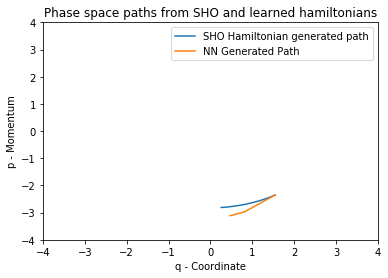

CurrentCost is: 0.47601350944016074

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.26367925629076233

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.2164053981323534

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.09751251074828765

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.09751251074828765

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


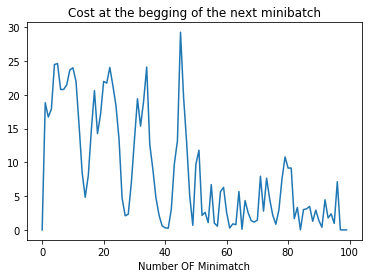

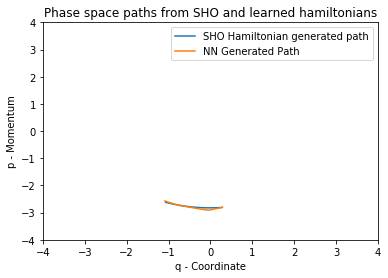

CurrentCost is: 0.13268194256904767

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.03717892530088298

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.03717892530088298

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.03717892530088298

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03717892530088298

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


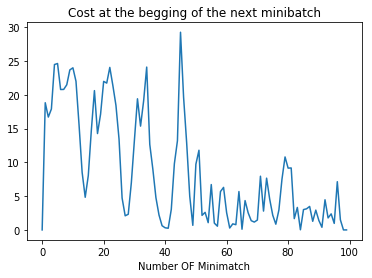

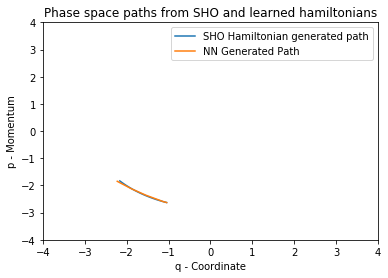

CurrentCost is: 0.4238881323015136

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.23143262554335048

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.09329320123383524

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.062426719043417

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.05860448549856521

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


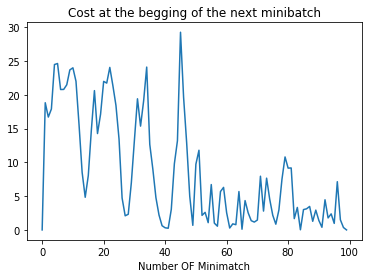

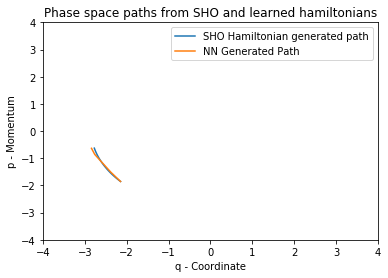

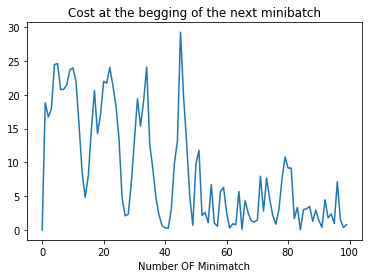

In [373]:
def Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))
#     Scaling_Factor1 = 1
#     Scaling_Factor2 = 1

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dp_true - dp_predicted)**2)

    Loss =  Loss2 + Loss1
    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)
            q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
    
            
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

def Prediction_for_State_Transitions(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    

def Calculate_NN_State_Transitions(Parameter_Vector,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total):


    
    
#     Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
#     Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])


    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)


    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])


    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):
#     for i in range(1,10):

        q_predicted[i] = q_true[i] + dq_predicted[i-1]
        p_predicted[i] = p_true[i] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Prediction_for_State_Transitions(Net1,Net2,np.array([q_true[i],p_true[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)
        
    return q_predicted, p_predicted, dq_predicted, dp_predicted



## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =10
Maximal_Random_Search = 0.3
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations =20
print_Cost = 1


x = 1
y = 1
First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
InitialParameters = np.random.rand(int(2*TotalParameters_in_5_layer_net),1)

T_total = 0.5
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)



# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    

plt.figure(0)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.show()

Number_Of_Minibatches = 100
Cost_Tracking_Vector = np.zeros(Number_Of_Minibatches)
for i in range (1,Number_Of_Minibatches):
    Number_Of_Itterations =5
    T_total = 0.5
    
    
    N = q_true.shape[0]
    First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
    q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
    
    Cost_Tracking_Vector[i]    = Cost1.Cost_Function(Best_Individual)

    Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)
#     q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

    q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    
    plt.figure(4)
    plt.plot(q_true,p_true)
    plt.plot(q_predicted,p_predicted)
    plt.title("Phase space paths from SHO and learned hamiltonians")
    plt.xlabel("q - Coordinate")
    plt.ylabel("p - Momentum")
    plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

    
    plt.figure(5)
    plt.title("Cost at the begging of the next minibatch")
    plt.plot(Cost_Tracking_Vector)
    plt.xlabel("Cost")
    plt.xlabel("Number OF Minimatch")


In [375]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(86,)
(86,)
(172, 1)
(172, 1)


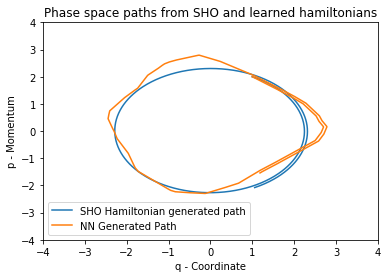

CurrentCost is: 76.18776293325955

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 76.18776293325955

Now Running Itteration 1 \ 5
the ImprovementItteration is: 2
CurrentCost is: 76.18776293325955

Now Running Itteration 2 \ 5
the ImprovementItteration is: 3
CurrentCost is: 76.18776293325955

Now Running Itteration 3 \ 5
the ImprovementItteration is: 4
CurrentCost is: 75.12422365699868

Now Running Itteration 4 \ 5
the ImprovementItteration is: 5


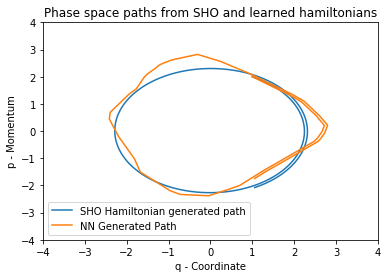

In [416]:
Best_Individual1 = Open_Parameters_Of_Network()
Best_Individual = Best_Individual1
T_total = 8.5
    
## Testing network on longer data
N = q_true.shape[0]
First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =2
Maximal_Random_Search = 0.01
NumberOfSamples = 10 ## This is the number of individuals in each itteration



Number_Of_Itterations =5
  
N = q_true.shape[0]
# First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [396]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [158]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [200]:



# print(TotalParameters_in_5_layer_net)
# Parameter_Vector = np.random.rand(2*TotalParameters_in_5_layer_net)
# print(Parameter_Vector.shape)
# print(Parameter_Vector[0:TotalParameters_in_5_layer_net].shape)


Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(548, 1)
548


C:\Users\benjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: ComplexWarning: Casting complex values to real discards the imaginary part


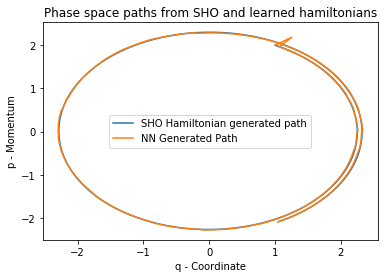

In [414]:
def Open_Parameters_Of_Network():
    Best_Individual1 = Load_Parameters_And_Indexes_Of_Specialist()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1


q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual1,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)



plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [260]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [261]:
q_true, p_true
N = q_true.shape[0]
print(N)
print(q_true[N-2],q_true[N-1])

100
-1.8227262218393177 -1.8088382485905183


(array([-2.15811612, -2.16194416, -2.16606121, -2.17017826, -2.17429531,
        -2.17841236, -2.18252941, -2.18664646, -2.19076351, -2.19488056,
        -2.19899762, -2.20311467, -2.20723172, -2.21134877, -2.21546582,
        -2.21958287, -2.22369992, -2.22781697, -2.23193402, -2.23605107,
        -2.24016813, -2.24428518, -2.24840223, -2.25251928, -2.25663633,
        -2.26075338, -2.26487043, -2.26898748, -2.27310453, -2.27722159,
        -2.28133864, -2.28545569, -2.28957274, -2.29368979, -2.29780684,
        -2.30192389, -2.30604094, -2.31015799, -2.31427504, -2.3183921 ,
        -2.32250915, -2.3266262 , -2.33074325, -2.3348603 , -2.33897735,
        -2.3430944 , -2.34721145, -2.3513285 , -2.35544556, -2.35956261,
        -2.36367966, -2.36779671, -2.37191376, -2.37603081, -2.38014786,
        -2.38426491, -2.38838196, -2.39249901, -2.39661607, -2.40073312,
        -2.40485017, -2.40896722, -2.41308427, -2.41720132, -2.42131837,
        -2.42543542, -2.42955247, -2.43366953, -2.4

In [305]:
print(int(1.3))

1
